# Final Project

## Kelompok 7
Nama Anggota:

Furqon Aryadana (5027231024)\
Dionisius Marcell Putra Indranto (5027231044)\
Benjamin Khawarizmi Habibi (5027231078)

## Dataset
- Data didapatkan dari kaggle dengan link sebagai berikut:
  https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels
- Memiliki 2 data dengan format .arff dan .csv
- Judul data nya ialah ObesityDataSet_raw_and_data_sinthetic.arff dan ObesityDataSet_raw_and_data_sinthetic.csv
- Dataset ini berisi data tentang obesitas pada individu dari Kolombia, Peru, dan Meksiko. Dataset ini terdiri dari 17 atribut dan 2111 rekaman. Rekaman tersebut diberi label dengan variabel kelas NObesity (Tingkat Obesitas) yang memungkinkan klasifikasi data.
- Dataset ini dihasilkan dari penelitian yang bertujuan untuk memprediksi tingkat obesitas pada individu berdasarkan kebiasaan makan dan kondisi fisiknya. Penelitian ini dilakukan pada individu dari tiga negara yaitu Kolombia, Peru, dan Meksiko. Dataset ini terdiri dari 2111 rekaman dengan 17 atribut yang meliputi jenis kelamin, usia, tinggi badan, berat badan, riwayat keluarga yang mengalami obesitas, frekuensi konsumsi makanan kalori tinggi, frekuensi konsumsi sayuran, jumlah makan utama dalam sehari, konsumsi makanan di antara waktu makan utama, kebiasaan merokok, konsumsi air putih harian, pemantauan konsumsi kalori, frekuensi aktivitas fisik, waktu penggunaan perangkat teknologi, konsumsi alkohol dan jenis transportasi yang digunakan.
- Owner dataset ini adalah Ankur Bajaj (Owner).
- Ukuran data yaitu 2111 baris dan 17 kolom.
- Terdiri dari 16 features dan 1 data label atau target.



# Attributes related with eating habits:
* Frequent consumption of high caloric food (FAVC),
* Frequency of consumption of vegetables (FCVC),
* Number of main meals (NCP),
* Consumption of food between meals (CAEC),
* Consumption of water daily (CH20),
* and Consumption of alcohol (CALC).

# Attributes related with physicial condition:
* Calories consumption monitoring (SCC),
* Physical activity frequency (FAF),
* Time using technology devices (TUE),
* Transportation used (MTRANS),

# Other Attributes :
* Gender,
* Age,
* Height,
* Weight.

In [64]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

plt.style.use('ggplot')

from sklearn.preprocessing import OrdinalEncoder

df = pd.read_csv('ObesityDataSet.csv')

In [65]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# Preprocessing

In [66]:
df = df.rename(columns={'family_history_with_overweight': 'FHWO',
                           'NObeyesdad' : 'BMI',})

In [67]:
df.shape

(2111, 17)

In [68]:
df.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [69]:
df.dtypes

Gender     object
Age       float64
Height    float64
Weight    float64
FHWO       object
FAVC       object
FCVC      float64
NCP       float64
CAEC       object
SMOKE      object
CH2O      float64
SCC        object
FAF       float64
TUE       float64
CALC       object
MTRANS     object
BMI        object
dtype: object

In [70]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  2111 non-null   object 
 1   Age     2111 non-null   float64
 2   Height  2111 non-null   float64
 3   Weight  2111 non-null   float64
 4   FHWO    2111 non-null   object 
 5   FAVC    2111 non-null   object 
 6   FCVC    2111 non-null   float64
 7   NCP     2111 non-null   float64
 8   CAEC    2111 non-null   object 
 9   SMOKE   2111 non-null   object 
 10  CH2O    2111 non-null   float64
 11  SCC     2111 non-null   object 
 12  FAF     2111 non-null   float64
 13  TUE     2111 non-null   float64
 14  CALC    2111 non-null   object 
 15  MTRANS  2111 non-null   object 
 16  BMI     2111 non-null   object 
dtypes: float64(8), object(9)
memory usage: 280.5+ KB


In [72]:
col = df.columns
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'FHWO', 'FAVC', 'FCVC', 'NCP',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'BMI'],
      dtype='object')

In [73]:
df.isnull().sum()

Gender    0
Age       0
Height    0
Weight    0
FHWO      0
FAVC      0
FCVC      0
NCP       0
CAEC      0
SMOKE     0
CH2O      0
SCC       0
FAF       0
TUE       0
CALC      0
MTRANS    0
BMI       0
dtype: int64

## Preprocessing Reports
- Attribute = 17
- Ukuran data : 2111
- Fitur : 16
- Label/ Target = 1
- Target: Tingkatan Obesitas (BMI)
- Jumlah null/data yang kosong disetiap kolom: 0

# Unique Value Attributes

In [74]:
object_cols = [col for col in df.columns if df[col].dtype == "object"]

good_label_cols = [col for col in object_cols if set(df[col]).issubset(set(df[col]))]
good_label_cols.remove('BMI')

print('Categorical columns that will be ordinal encoded:', good_label_cols)

Categorical columns that will be ordinal encoded: ['Gender', 'FHWO', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [75]:
printf = 'Value Unique {}:\n {} \n'

for count, i in enumerate(object_cols):
    val_count = df['{}'.format(i)].value_counts()
    print(count, printf.format(i, val_count))

0 Value Unique Gender:
 Gender
Male      1068
Female    1043
Name: count, dtype: int64 

1 Value Unique FHWO:
 FHWO
yes    1726
no      385
Name: count, dtype: int64 

2 Value Unique FAVC:
 FAVC
yes    1866
no      245
Name: count, dtype: int64 

3 Value Unique CAEC:
 CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64 

4 Value Unique SMOKE:
 SMOKE
no     2067
yes      44
Name: count, dtype: int64 

5 Value Unique SCC:
 SCC
no     2015
yes      96
Name: count, dtype: int64 

6 Value Unique CALC:
 CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64 

7 Value Unique MTRANS:
 MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64 

8 Value Unique BMI:
 BMI
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I

## Convert

In [76]:
df.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [77]:
df_convert = df.copy()
ordinal_encoder = OrdinalEncoder()
df_convert[good_label_cols] = ordinal_encoder.fit_transform(df_convert[good_label_cols])

In [78]:
dic_to_replace = {"BMI": {"Insufficient_Weight": 0, 
                          "Normal_Weight": 1,
                         'Overweight_Level_I': 2,
                          'Overweight_Level_II': 3,
                          'Obesity_Type_I': 4,
                          'Obesity_Type_II': 5,
                          'Obesity_Type_III': 6,}
                         }
df_convert.replace(dic_to_replace, inplace=True)

In [79]:
df_convert

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,0.0,21.000000,1.620000,64.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,0.000000,1.000000,3.0,3.0,1
1,0.0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,2.0,1.0,3.000000,1.0,3.000000,0.000000,2.0,3.0,1
2,1.0,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,2.000000,1.000000,1.0,3.0,1
3,1.0,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,2.0,0.0,2.000000,0.0,2.000000,0.000000,1.0,4.0,2
4,1.0,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,2.0,0.0,2.000000,0.0,0.000000,0.000000,2.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,2.0,0.0,1.728139,0.0,1.676269,0.906247,2.0,3.0,6
2107,0.0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,2.0,0.0,2.005130,0.0,1.341390,0.599270,2.0,3.0,6
2108,0.0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,2.0,0.0,2.054193,0.0,1.414209,0.646288,2.0,3.0,6
2109,0.0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,2.0,0.0,2.852339,0.0,1.139107,0.586035,2.0,3.0,6


In [80]:
df_convert.describe()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.859308,0.020843,2.008011,0.045476,1.010298,0.657866,2.268593,2.365230,3.112269
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,1.261423,1.985062
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,2.000000,0.000000,1.584812,0.000000,0.124505,0.000000,2.000000,3.000000,1.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.625350,2.000000,3.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.477420,0.000000,1.666678,1.000000,3.000000,3.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


## Preprocessing Report
- Data dengan tipe object berjumlah 8 attribute yaitu 'Gender', 'FHWO', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'BMI'
- Data features dengan tipe object berjumlah 7 attribute yaitu semua data objeck selain 'BMI'
- Data target/label dengan tipe object yaitu 'BMI'
- Semua data features dengan tipe object ditransform encoding dengan menggunakan class OrdinalEncoder yang terdapat di library sklearn.preprocessing
- Data target juga di transform encoding namujn dengan cara manual yaitu mengubah variabel yang terdapat di kolom target atau BMI menjadi bentuk numerik.
- Transformation encoding dilakukan agar dapat diproses oleh algoritma machine learning.

# Exploratory Data Analysis

## Data Visualization

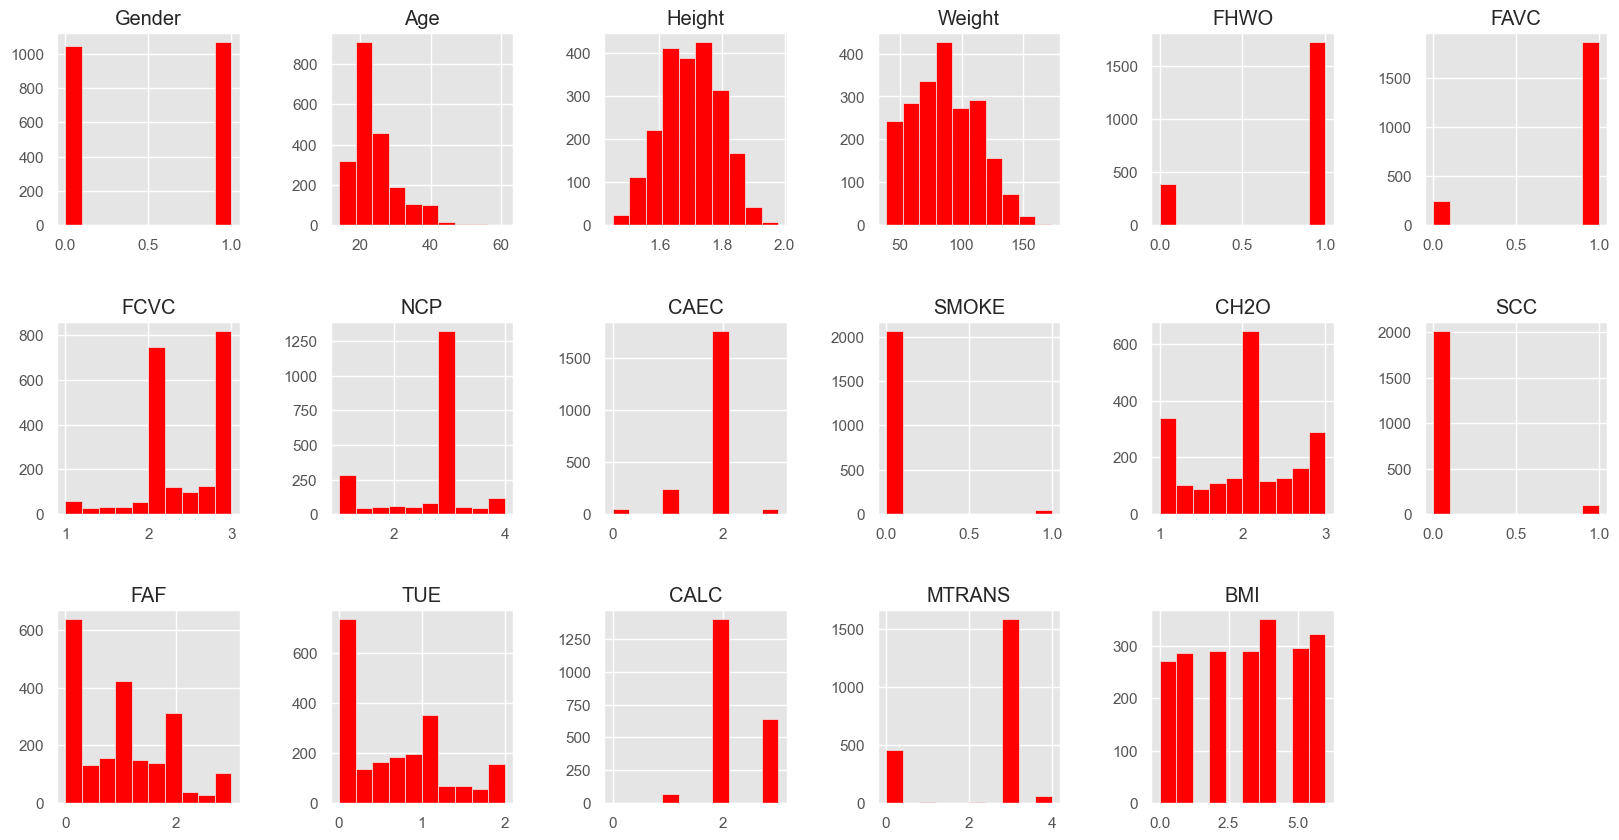

In [81]:
# Menghitung jumlah baris dan kolom yang dibutuhkan
n_cols = len(df_convert.columns)
n_rows = math.ceil(n_cols/6)

# Mengatur ukuran figure
fig, axes = plt.subplots(nrows=n_rows, ncols=6, figsize=(20, 10))

# Mengatur jarak antar subplot
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Menampilkan histogram pada setiap kolom
for i, ax in enumerate(axes.flatten()):
    if i < n_cols:
        ax.hist(df_convert.iloc[:, i], bins=10, color = 'red')
        ax.set_title(df_convert.columns[i])
    else:
        fig.delaxes(ax) # Menghapus subplot yang tersisa

# Menampilkan grafik
plt.show()

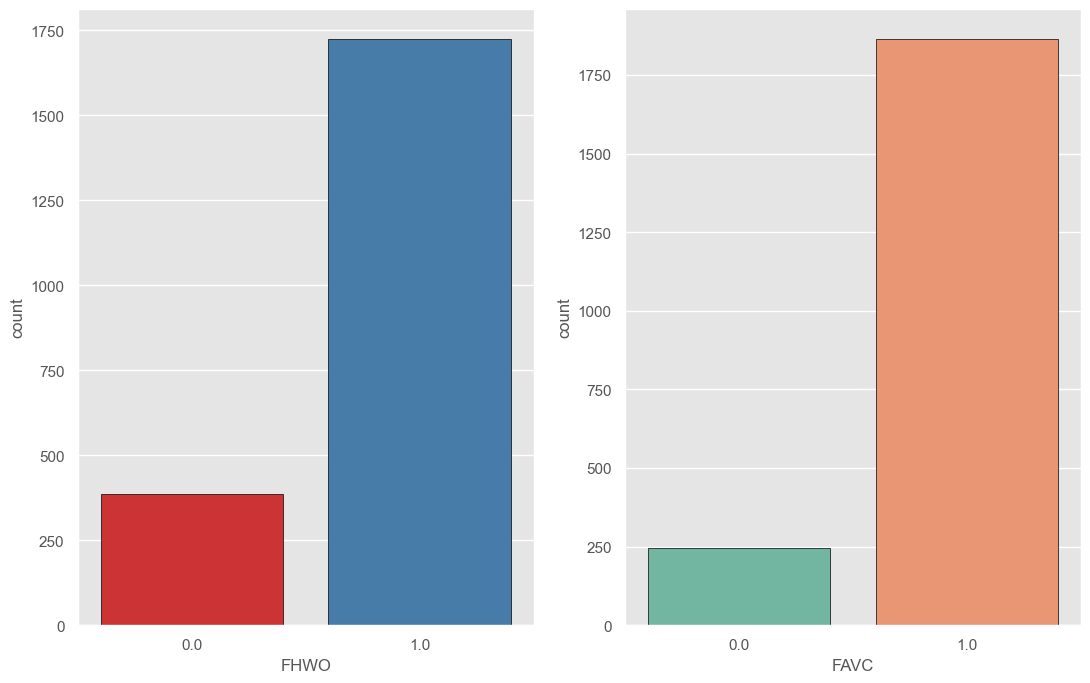

In [82]:
plt.figure(figsize=(20,8))
plt.subplot(131)
sns.countplot(x= 'FHWO', data = df_convert, palette="Set1",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'FAVC', data = df_convert, palette="Set2",edgecolor="black")
plt.savefig('count1.png', bbox_inches='tight',pad_inches=0)

## Label
* FHWO -> 0 = No, 1 = Yes
* FAVC -> 0 = No, 1 = Yes

> Berdasarkan grafik di atas, dapat diketahui bahwa lebih banyak responden yang memiliki keturunan obesitas (FHWO) yaitu < 1750 orang dan lebih banyak responden yang sering memakan makanan yang tinggi kalori (FAVC) yaitu > 1750 orang

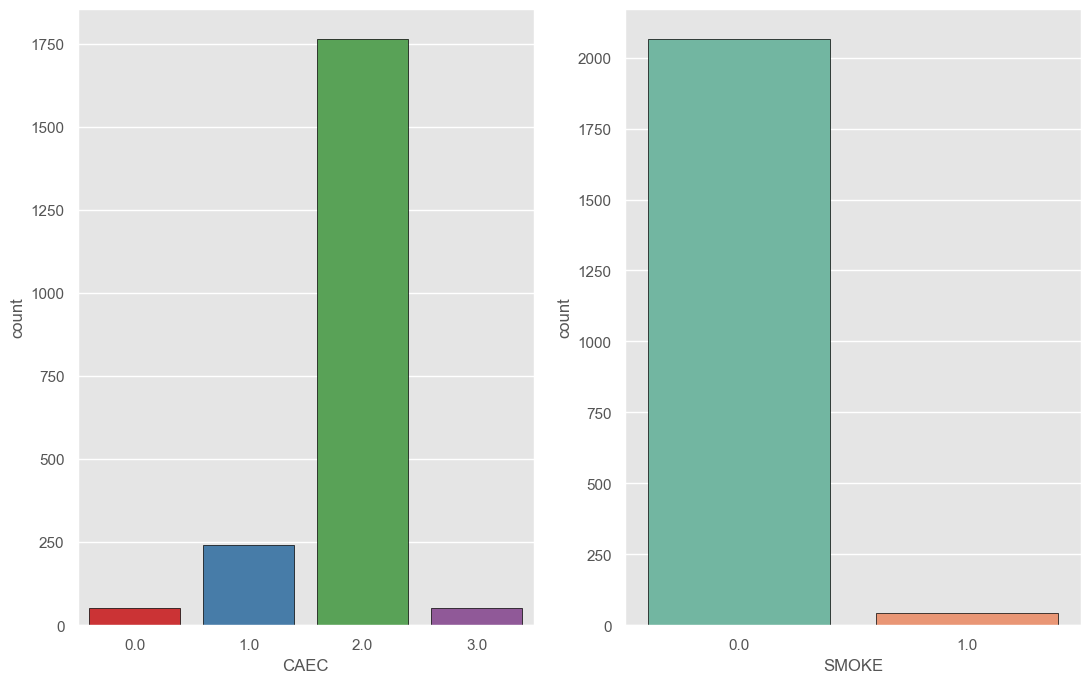

In [83]:
plt.figure(figsize=(20,8))
plt.subplot(131)
sns.countplot(x= 'CAEC', data = df_convert, palette="Set1",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'SMOKE', data = df_convert, palette="Set2",edgecolor="black")
plt.savefig('count2.png', bbox_inches='tight',pad_inches=0)

## Label
* CAEC -> 0 = Always, 1 = Frequently, 2 = Sometimes, 3 = No
* SMOKE -> 0 = No, 1 = Yes

> Berdasarkan grafik di atas bahwa 1750 orang responden memiliki kebiasaan makan di sela - sela waktu makan (CAEC) yang tidak sering (sometimes) dan > 2000 responden menyatakan bahwa mereka tidak merokok

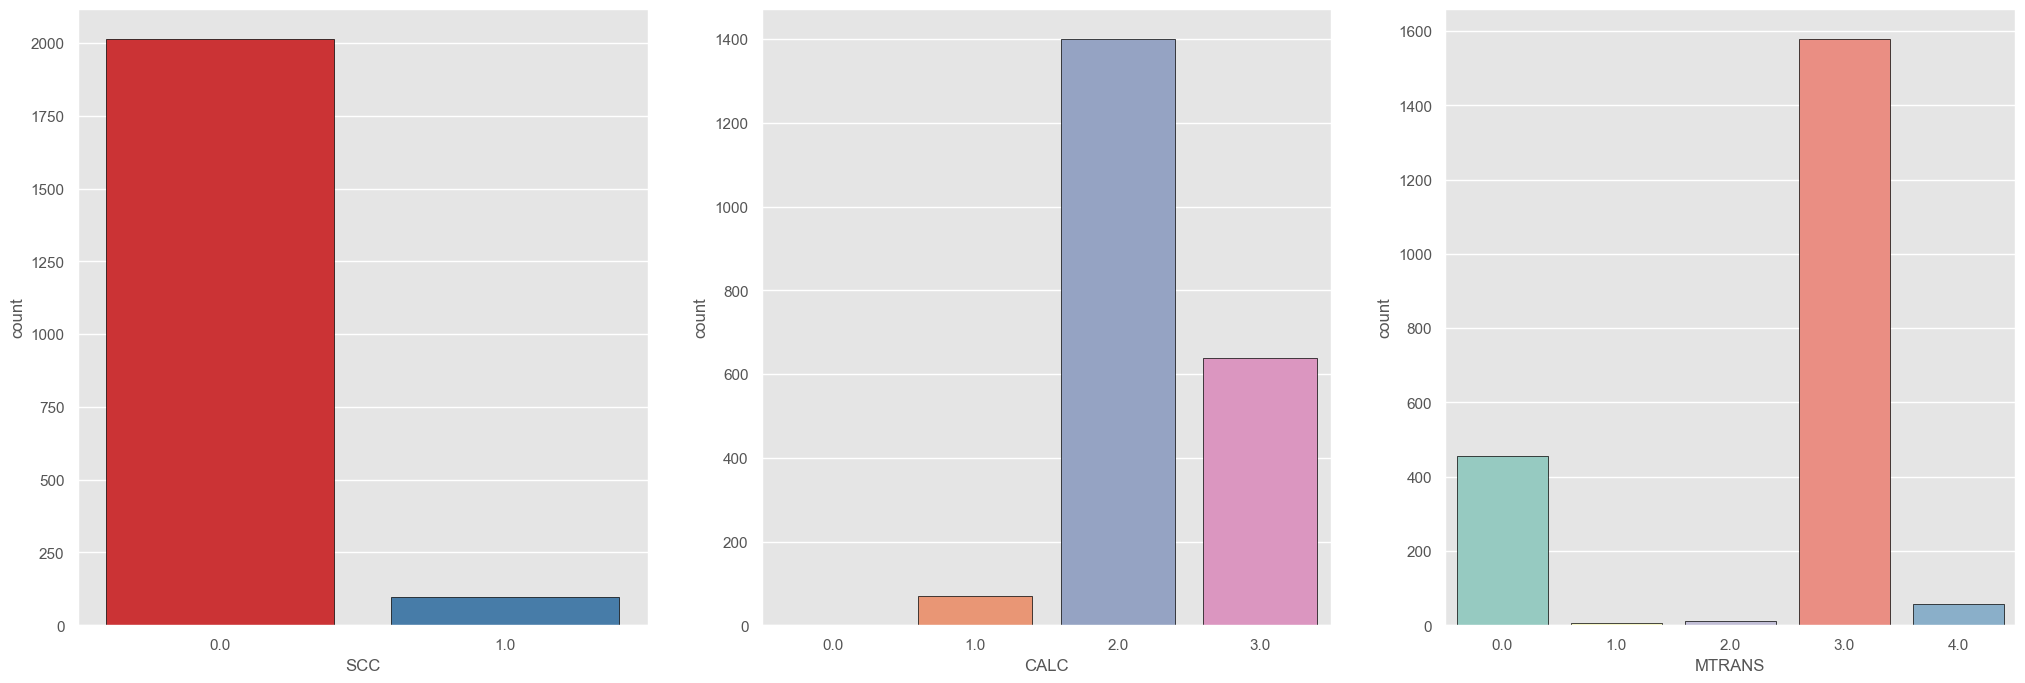

In [84]:
plt.figure(figsize=(25,8))
plt.subplot(131)
sns.countplot(x= 'SCC', data = df_convert, palette="Set1",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'CALC', data = df_convert, palette="Set2",edgecolor="black")
plt.subplot(133)
sns.countplot(x= 'MTRANS', data = df_convert, palette="Set3",edgecolor="black")
plt.savefig('count3.png', bbox_inches='tight',pad_inches=0)

## Label 
* SCC -> 0 = No, 1 = Yes
* CALC -> 0 = Always, 1 = Frequently, 2 = Sometimes, 3 = No
* MTRANS -> 0 = Automobile, 1 = Motorbike, 2 = Bike, 3 = Public Transportation, 4 = Walking

> Berdasarkan grafik di atas, 2000 responden tidak memantau konsumsi kalori harian (SCC) mereka, 1400 responden tidak sering (sometimes) mengonsumsi alkohol (CALC) dan < 1400 responden lebih suka menggunakan transportasi umum untuk mobilitas sehari - hari (MTRANS)

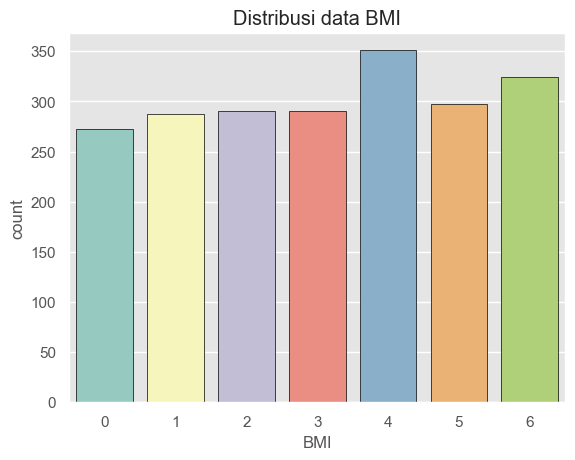

In [85]:
ax = sns.countplot(x = "BMI",data=df_convert, palette="Set3",edgecolor="black")
plt.title('Distribusi data BMI')
sns.set(font_scale=1)
plt.savefig('Distribusi_hist.png')

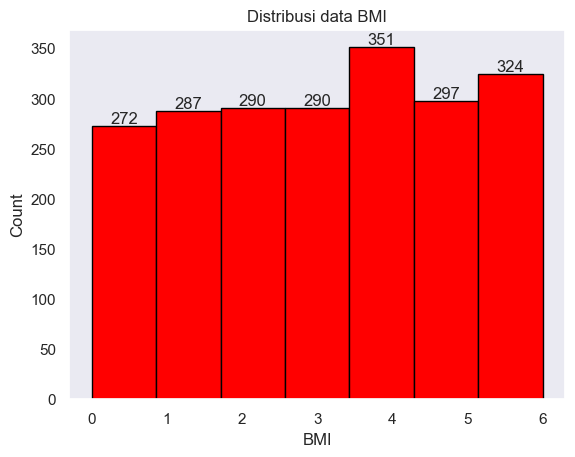

In [86]:
counts, edges, bars = plt.hist(df_convert['BMI'],edgecolor='black',bins=7, color = 'red')
plt.bar_label(bars)
plt.ylabel('Count')
plt.xlabel('BMI')
plt.title('Distribusi data BMI')
plt.grid()
plt.show()

## Label
- Insufficient_Weight   : 0
- Normal_Weight         : 1
- Overweight_Level_I    : 2
- Overweight_Level_II   : 3
- Obesity_Type_I        : 4
- Obesity_Type_II       : 5
- Obesity_Type_III      : 6

In [87]:
corr = df_convert.corr()

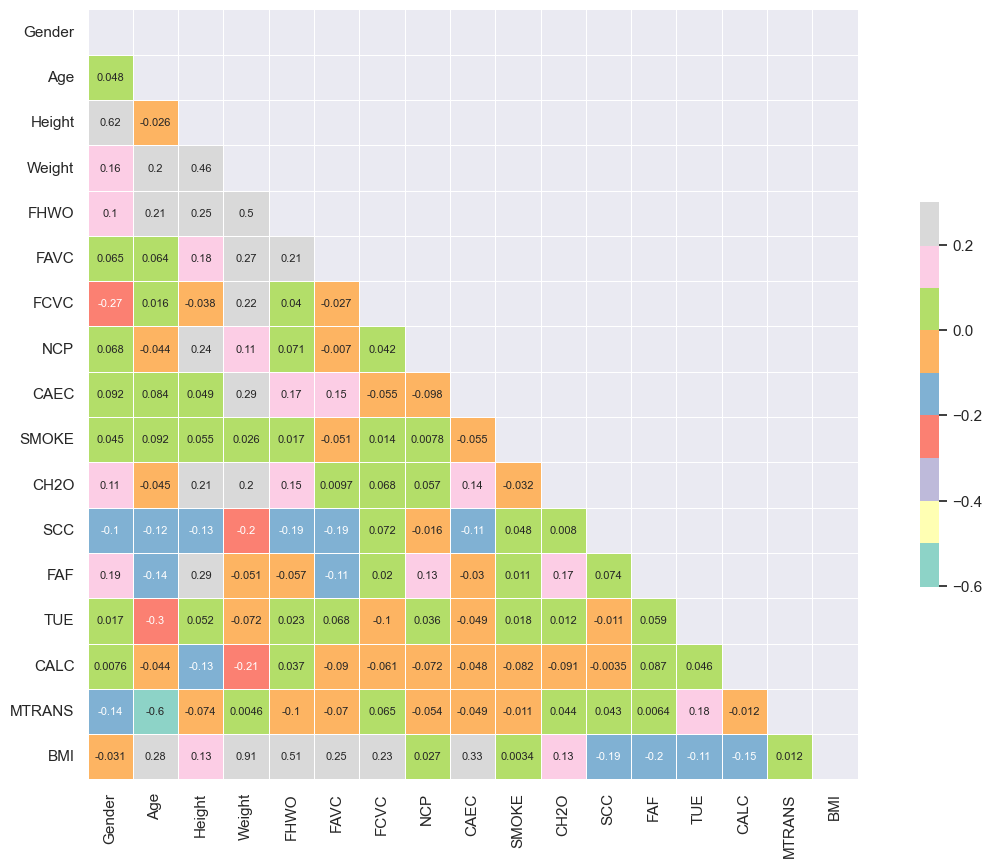

In [88]:
sns.set_theme(style="dark")
f, ax = plt.subplots(figsize=(16, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.color_palette("Set3", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            annot = True, annot_kws={"size": 8})
plt.savefig('correlation.png', bbox_inches='tight',pad_inches=0)

## Sebaran Data BMI terhadap Gender, Weight, Height dan Age

c:\Users\Dionisius Marcell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


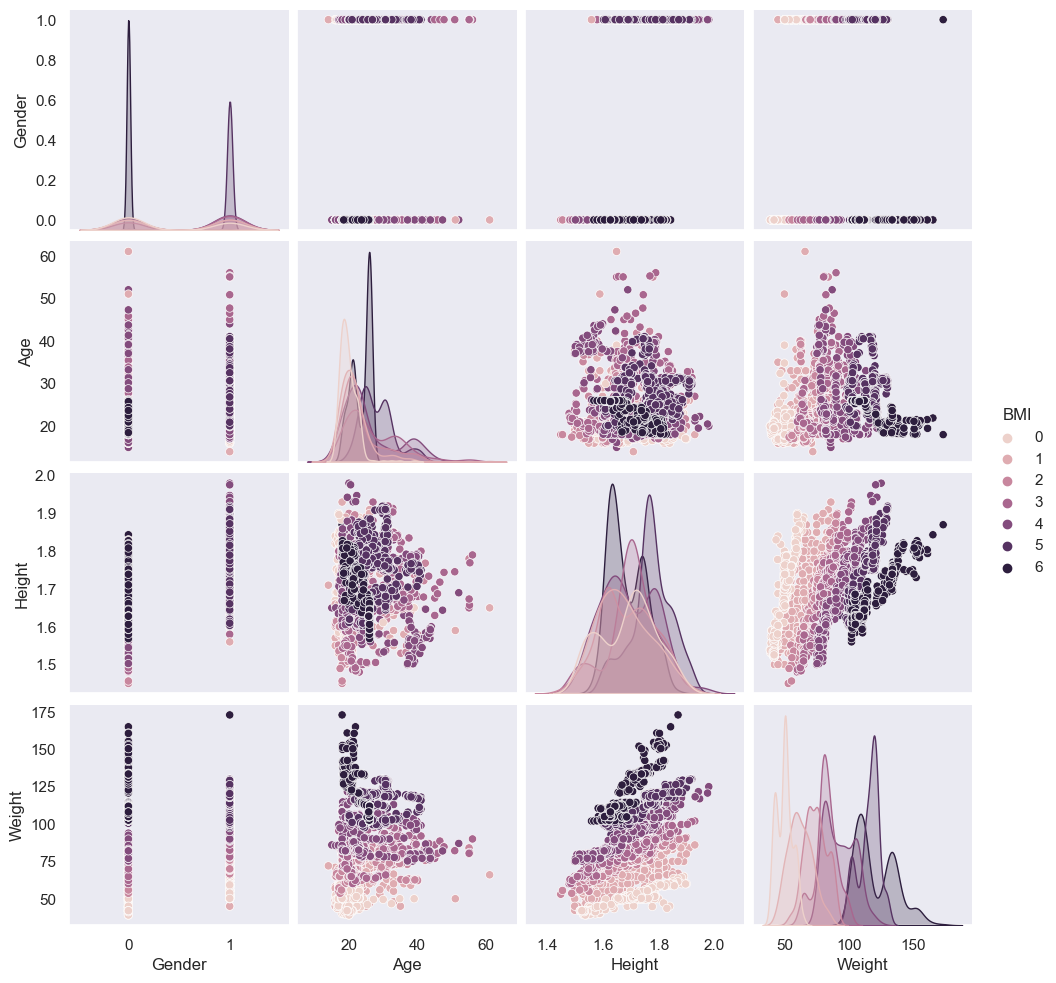

In [89]:
sns.pairplot(df_convert, 
             hue ='BMI', 
             vars = ['Gender','Age', 
                     'Height', 'Weight'])
plt.savefig('pairplot1.png')

## Perbandingan Klasifikasi obesitas dengan Orang - Orang yang memiliki Keturunan Obesitas

[Text(0.5, 1.0, 'BMI vs FHWO')]

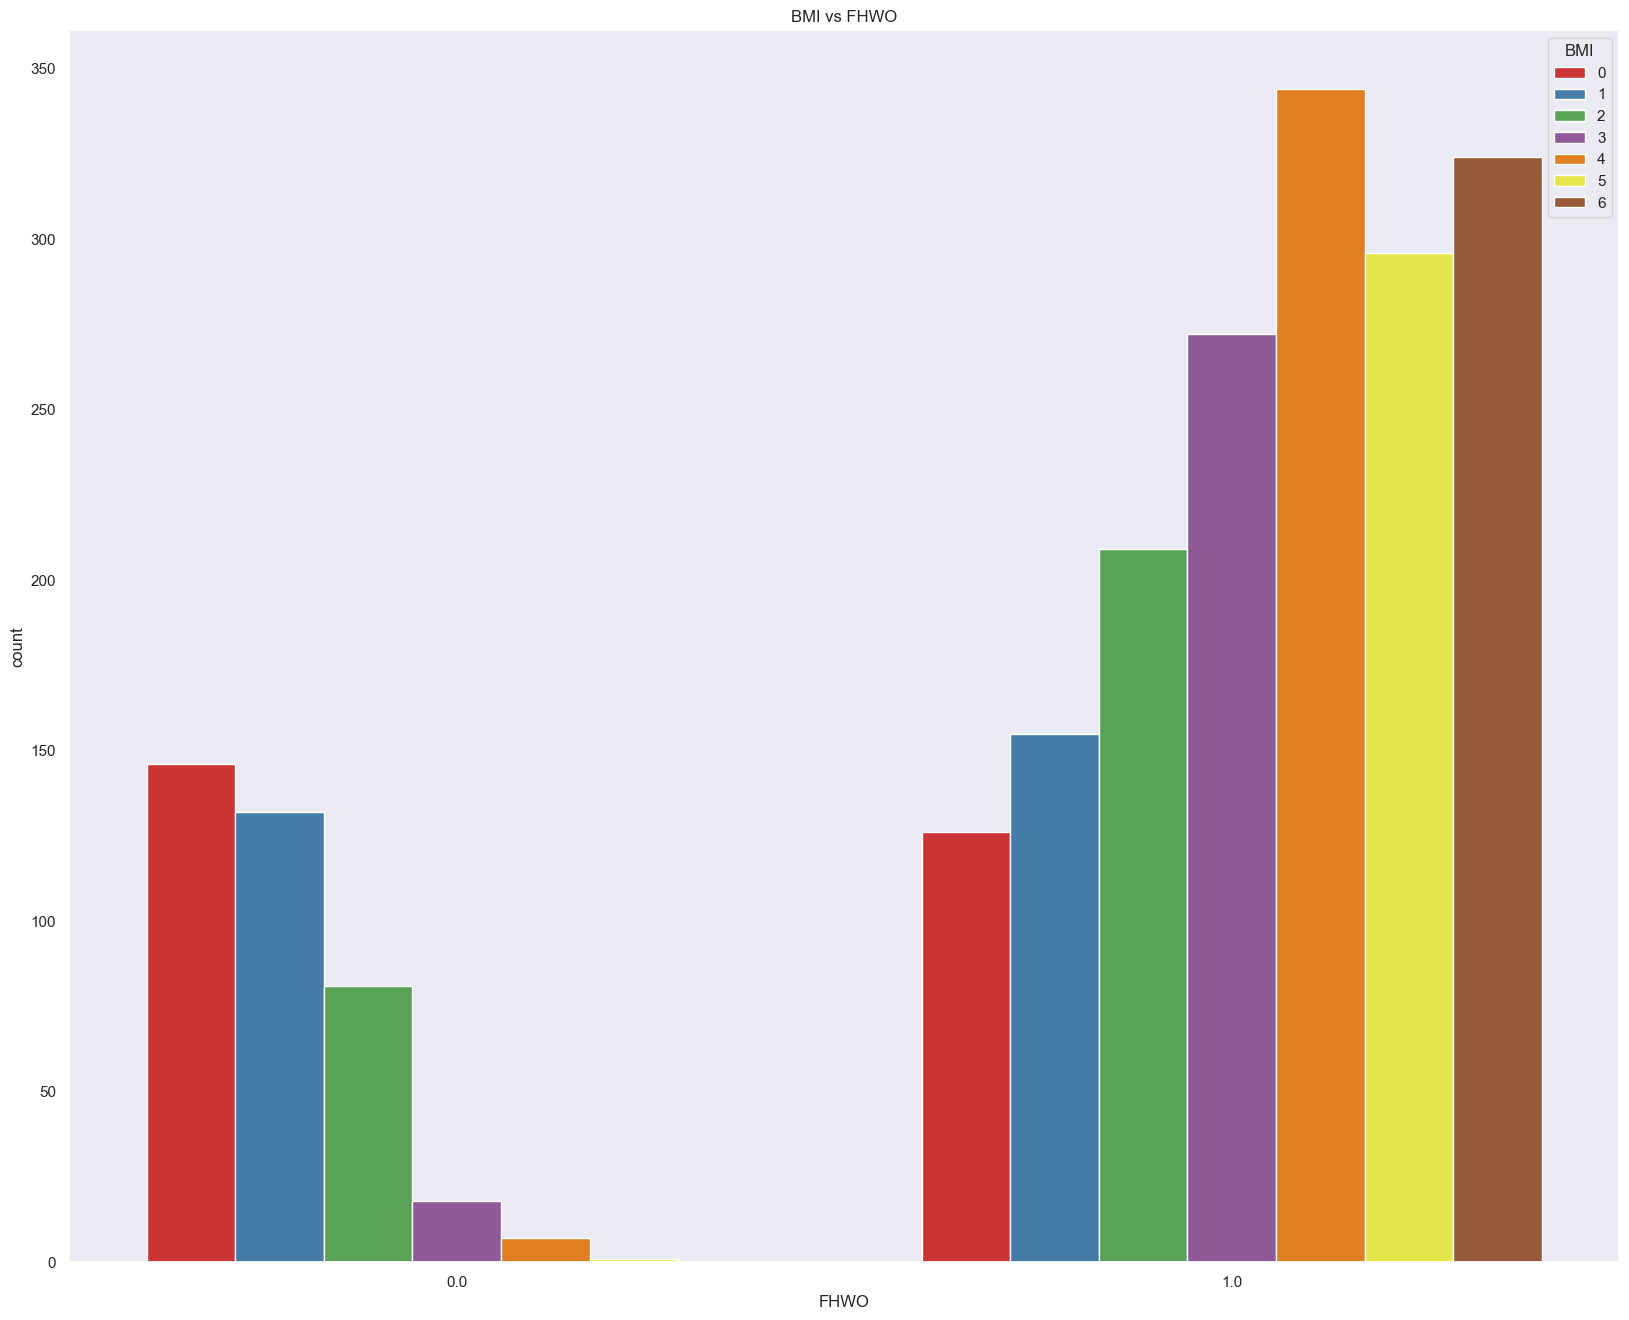

In [98]:
plt.figure(figsize = (20, 16))
sns.countplot(data = df_convert, x = 'FHWO', hue = 'BMI', palette = 'Set1').set(title='BMI vs FHWO')

> Berdasarkan grafik di atas, Responden yang memiliki keturunan obesitas lebih rentan untuk mengalami obesitas jika dibandingkan dengan responden yang tidak memiliki keturunan obesitas

## Perbandingan Klasifikasi obesitas dengan Weight

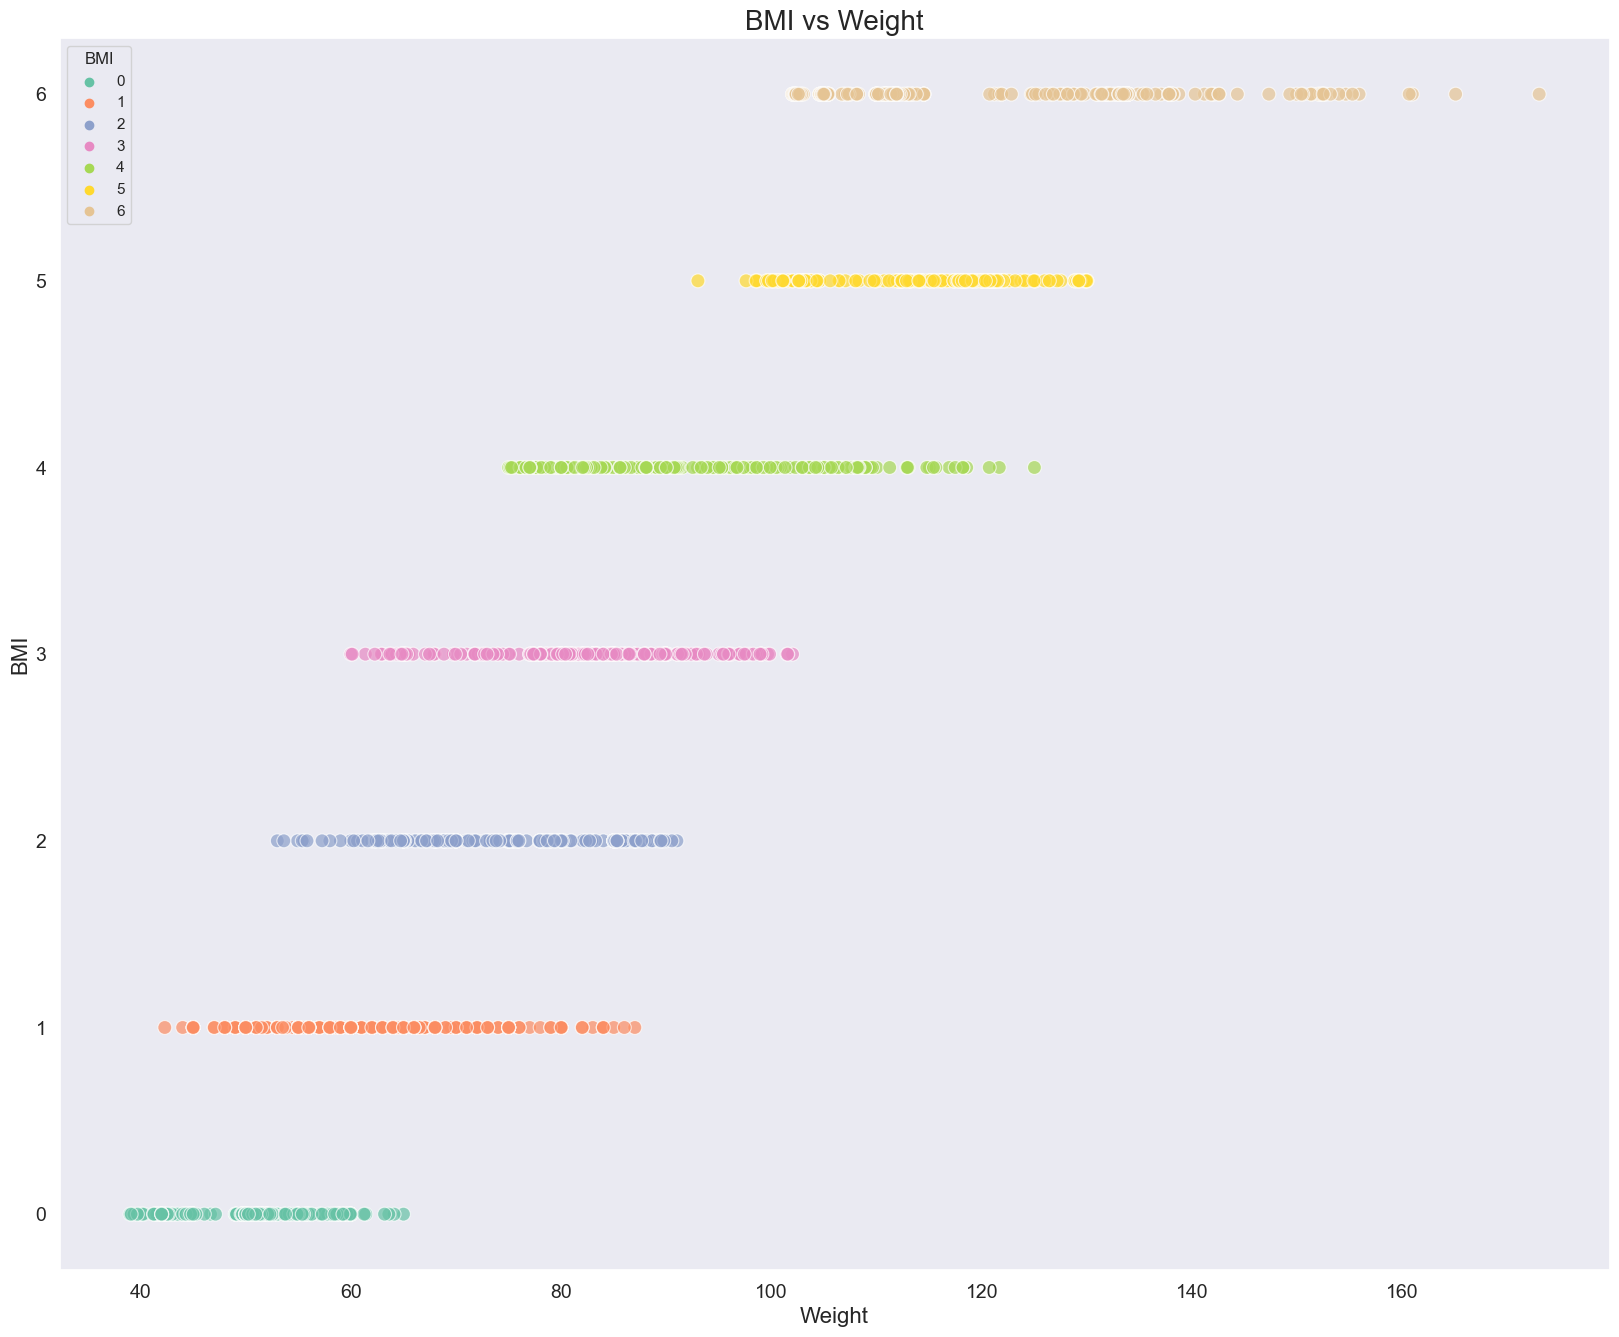

In [91]:
plt.figure(figsize=(20, 16))
sns.scatterplot(data=df_convert, x='Weight', y='BMI', hue='BMI', palette='Set2', alpha=0.7, s=100)
plt.title('BMI vs Weight', fontsize=20)
plt.xlabel('Weight', fontsize=16)
plt.ylabel('BMI', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

> Berdasarkan grafik di atas, Berat badan berbanding dengan meningkatkan tingkat dan level klasifikasi Obesitas (BMI)

## Perbandingan Klasifikasi Obesitas dengan konsumsi makanan di antara waktu makan

[Text(0.5, 1.0, 'BMI vs CAEC')]

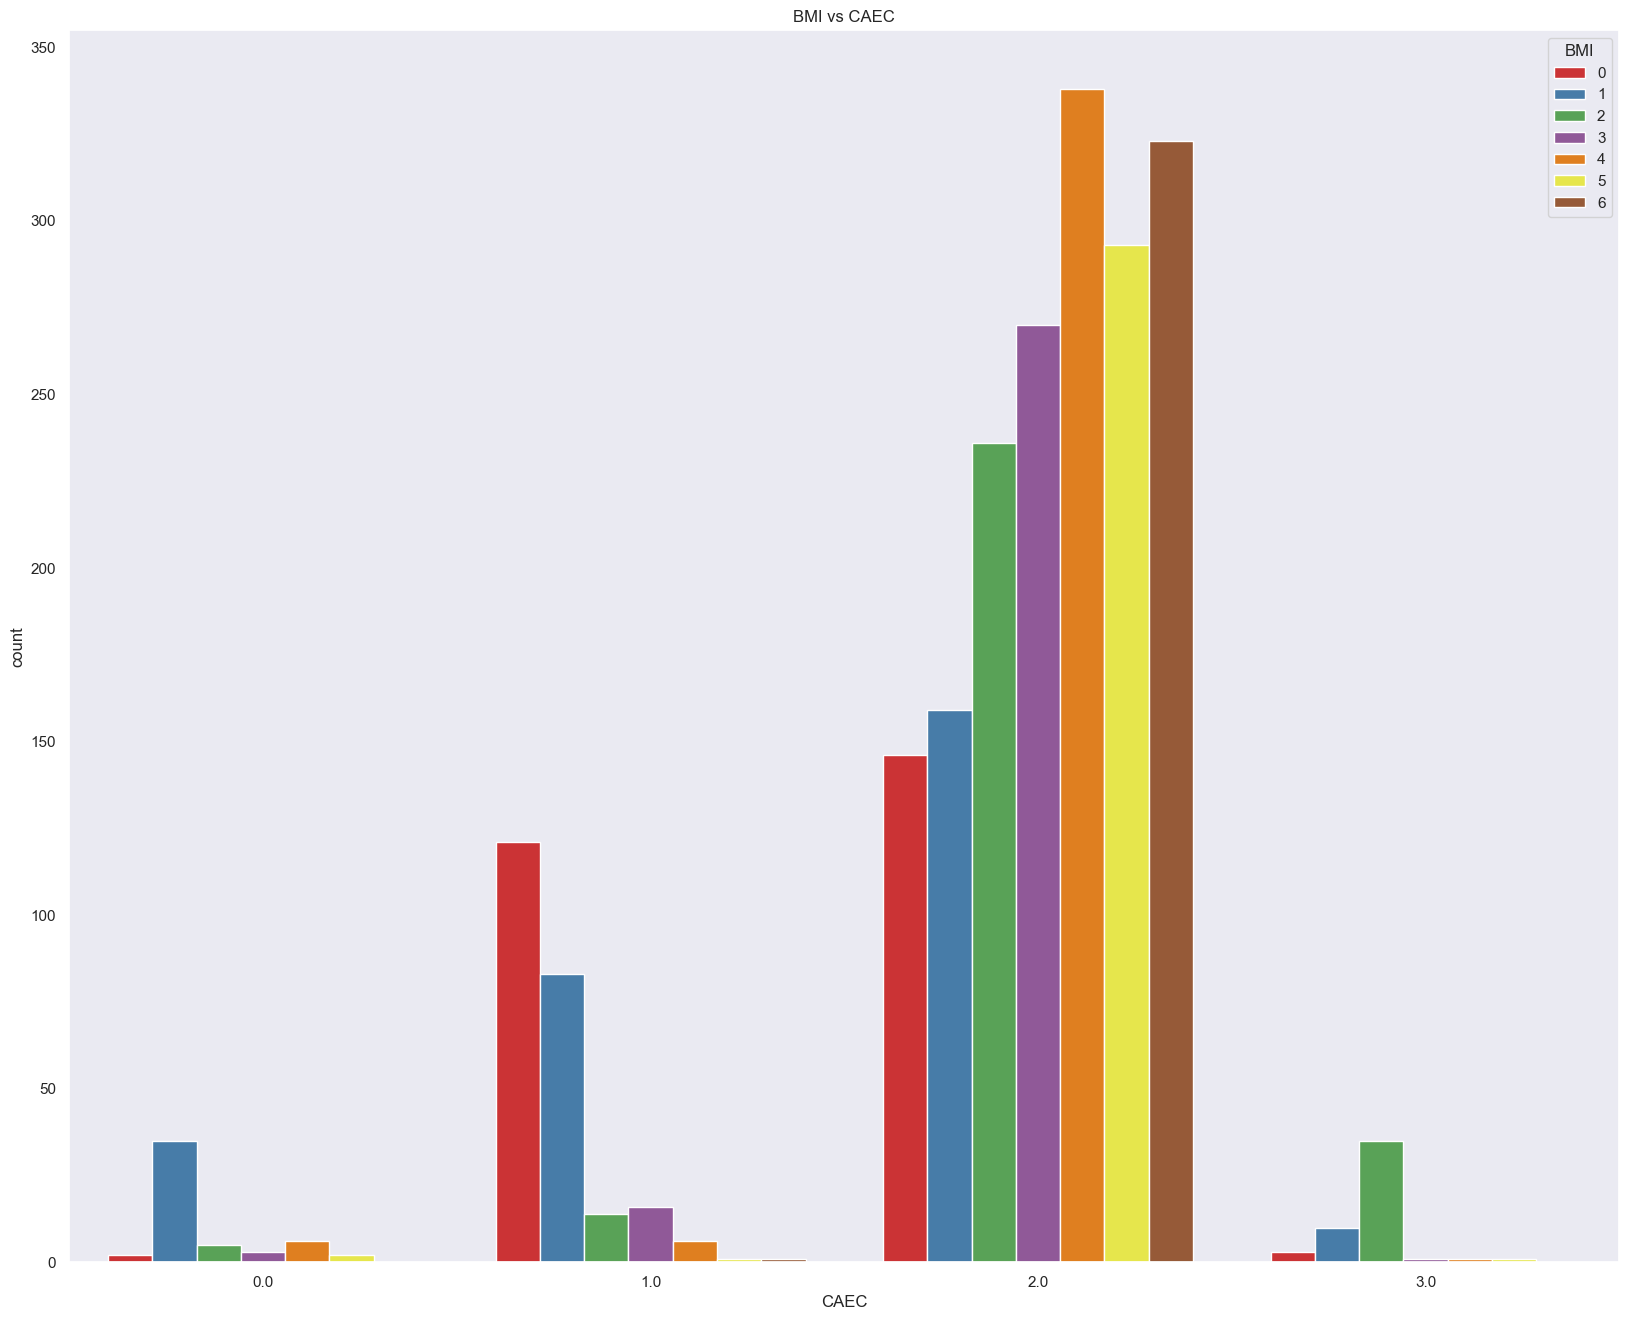

In [97]:
plt.figure(figsize = (20, 16))
sns.countplot(data = df_convert, x = 'CAEC', hue = 'BMI', palette = 'Set1').set(title='BMI vs CAEC')


> Berdasarkan grafik di atas, Responden yang memiliki kebiasaan memakan makanan di sela - sela waktu makan yang tidak begitu sering memiliki kerentanan lebih untuk mengalami obesitas